In [37]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
from shapely.geometry import Point, Polygon 
from OSMPythonTools.api import Api
from pyrosm import get_data
from pyrosm import OSM
import overpy
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
from OSMPythonTools.nominatim import Nominatim

C:\Users\danie\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


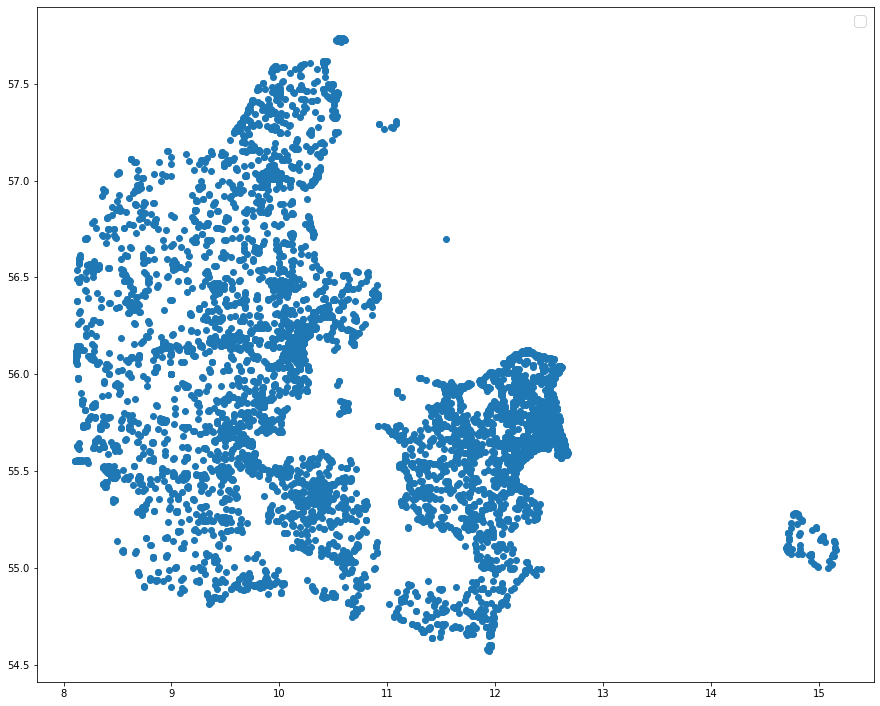

In [29]:
df_boligsiden = pd.read_csv(r'C:\Users\danie\OneDrive\Documents\GitHub\assignment1\boligsiden_api_moritz\data\boligsiden_10000.csv')
geometry = [Point(xy) for xy in zip(df_boligsiden['longitude'], df_boligsiden['latitude'])]
geometry[:3]
df_geo = gpd.GeoDataFrame(df_boligsiden,crs = {'init': 'epsg:4326'}, geometry = geometry)
df_geo.head()

fig, ax = plt.subplots(figsize = (15,15))
df_geo.plot(ax=ax)
plt.legend(prop={'size': 15})


In [19]:
api = Api()
way = api.query('way/5887599')
way.tag('building')

'castle'

In [26]:

fp = get_data("test_pbf")

# Initialize the reader
osm = OSM(fp)

# Read buildings with custom filter
my_filter = {"building": ["residential", "retail"]}
buildings = osm.get_buildings(custom_filter=my_filter)

# Plot
title = "Filtered buildings: " + ", ".join(buildings["building"].unique())
ax = buildings.plot(column="building", cmap="RdBu", legend=True)
ax.set_title(title);

TypeError: Input must be valid geometry objects: POLYGON ((26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523, 26.945 60.523))

In [27]:


api = overpy.Overpass()

# fetch all ways and nodes
result = api.query("""
    way(50.746,7.154,50.748,7.157) ["highway"];
    (._;>;);
    out body;
    """)

In [58]:

nominatim = Nominatim()
id_cph = nominatim.query('Copenhagen, Denmark').areaId()
id_vienna = nominatim.query('Vienna, Austria').areaId()

print(id_cph, id_vienna)

overpass = Overpass()
query = overpassQueryBuilder(area=id_cph, elementType='relation', selector='"boundary"="administrative"',includeGeometry=True)
#query = overpassQueryBuilder(area=area_id, elementType='node', selector='"natural"="tree"', out='count')

result = overpass.query(query)
result.countElements()
#firstElement = result.elements()[0]
#print(firstElement.geometry()['coordinates'][0])






[overpass] downloading data: [timeout:25][out:json];area(3600175928)->.searchArea;(relation["boundary"="administrative"](area.searchArea);); out body geom;


3600175928 3600109166


1

In [42]:
from OSMPythonTools.nominatim import Nominatim
nominatim = Nominatim()
areaId = nominatim.query('Vienna, Austria').areaId()

from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
overpass = Overpass()
query = overpassQueryBuilder(area=areaId, elementType='node', selector='"natural"="tree"', out='count')
result = overpass.query(query)
result.countElements()

[nominatim] downloading data: search
[overpass] downloading data: [timeout:25][out:json];area(3600109166)->.searchArea;(node["natural"="tree"](area.searchArea);); out count;


146406